In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [114]:
covid=pd.read_csv('covid_worldwide.csv',index_col=False)
covid.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [115]:
covid.shape

(231, 8)

In [116]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [117]:
covid.drop('Serial Number', axis=1, inplace=True)

In [118]:
covid.dtypes

Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

In [119]:
covid.Country.describe()

count     231
unique    231
top       USA
freq        1
Name: Country, dtype: object

In [120]:
display(covid.Country.values)


array(['USA', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'S. Korea',
       'Italy', 'UK', 'Russia', 'Turkey', 'Spain', 'Vietnam', 'Australia',
       'Argentina', 'Taiwan', 'Netherlands', 'Iran', 'Mexico',
       'Indonesia', 'Poland', 'Colombia', 'Austria', 'Greece', 'Portugal',
       'Ukraine', 'Chile', 'Malaysia', 'Israel', 'DPRK', 'Thailand',
       'Belgium', 'Czechia', 'Canada', 'Peru', 'Switzerland',
       'Philippines', 'South Africa', 'Romania', 'Denmark', 'Hong Kong',
       'Sweden', 'Serbia', 'Iraq', 'Singapore', 'Hungary', 'New Zealand',
       'Bangladesh', 'Slovakia', 'Georgia', 'Jordan', 'Ireland',
       'Pakistan', 'Norway', 'Finland', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Bulgaria', 'Morocco', 'Croatia', 'Lebanon',
       'Guatemala', 'Bolivia', 'Costa Rica', 'Tunisia', 'Cuba', 'Ecuador',
       'UAE', 'Uruguay', 'Panama', 'Mongolia', 'Nepal', 'Belarus',
       'Latvia', 'Saudi Arabia', 'Azerbaijan', 'Paraguay', 'Bahrain',
       'Sri Lanka', 'Kuwai

In [121]:
#changing types from object to float 
covid['Total Cases']=covid['Total Cases'].str.replace(',', '', regex=True).astype("float")
covid['Total Deaths']=covid['Total Deaths'].str.replace(',', '', regex=True).astype("float")
covid['Total Recovered']=covid['Total Recovered'].str.replace(',', '', regex=True).astype("float")
covid['Active Cases']=covid['Active Cases'].str.replace(',', '', regex=True).astype("float")
covid['Total Test']=covid['Total Test'].str.replace(',', '', regex=True).astype("float")
covid['Population']=covid['Population'].str.replace(',', '', regex=True).astype("float")

In [122]:
# missing value in %
covid.isnull().sum()/covid.shape[0]*100

Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64

In [123]:
covid.isnull().sum()

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [124]:
covid[covid['Population'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
226,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
229,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [125]:
#using internet to Fill missing data
covid.loc[90,'Population']=1439323776
covid.loc[226,'Population']=2666
covid.loc[229,'Population']=2047

In [126]:
covid['Total Deaths'].fillna(0, inplace=True)

In [127]:
covid[covid['Total Recovered'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


In [128]:
#missing info
covid.dropna(inplace=True)

In [129]:
covid.shape

(197, 7)

In [130]:
covid.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,3.298023e+06,3.347079e+04,3.166735e+06,9.781706e+04,3.422428e+07,3.905431e+07
std,1.014762e+07,1.119957e+05,9.800712e+06,7.947584e+05,1.217717e+08,1.484342e+08
min,1.403000e+03,0.000000e+00,4.380000e+02,0.000000e+00,7.850000e+03,3.539000e+03
25%,3.749100e+04,3.120000e+02,3.303300e+04,7.400000e+01,4.004660e+05,1.016097e+06
50%,2.977570e+05,3.155000e+03,2.889910e+05,1.253000e+03,2.610114e+06,6.844597e+06
75%,1.700253e+06,1.682800e+04,1.685183e+06,1.092600e+04,1.524701e+07,2.791155e+07
max,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.439324e+09


In [131]:
covid['percentage of patients death']=(covid['Total Deaths']/covid['Total Cases'])

In [132]:
top_cases= covid[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[:10]
top_cases

,Country,Total Deaths
0,USA,1132935.0
4,Brazil,697074.0
1,India,530740.0
9,Russia,395108.0
18,Mexico,332198.0
34,Peru,218931.0
8,UK,204171.0
7,Italy,186833.0
3,Germany,165711.0
2,France,164233.0


In [133]:
less_cases =covid[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[187:]
less_cases

,Country,Total Deaths
194,Vanuatu,14.0
185,Tonga,13.0
217,Anguilla,12.0
213,Palau,9.0
224,Montserrat,8.0
220,Wallis and Futuna,7.0
209,Cook Islands,2.0
219,Saint Pierre Miquelon,2.0
216,Nauru,1.0
223,Falkland Islands,0.0


In [134]:
covid['recovered by cases']=covid['Total Cases']-covid['Total Recovered']
best_recovery=covid[['Country','recovered by cases']].sort_values(by='recovered by cases',ascending=False)
best_recovery[:10]

,Country,recovered by cases
5,Japan,11021017.0
0,USA,2874082.0
20,Poland,1044285.0
12,Vietnam,914029.0
4,Brazil,905208.0
18,Mexico,761619.0
9,Russia,602688.0
1,India,532495.0
6,S. Korea,456189.0
15,Taiwan,439845.0


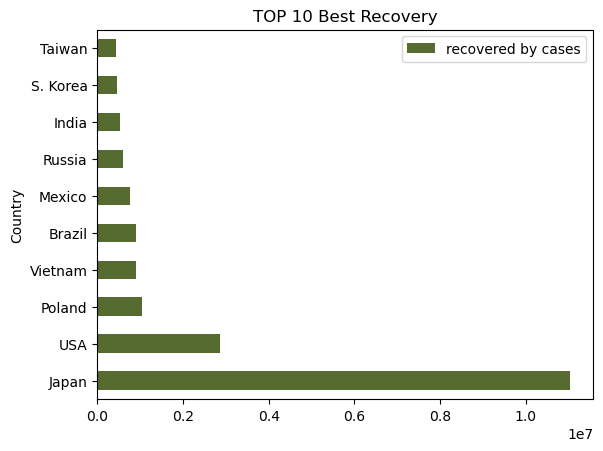

In [136]:
best_recovery[:10].plot(kind='barh', x='Country', y='recovered by cases',color='darkolivegreen',title='TOP 10 Best Recovery');

In [140]:
percentage_of_death=covid[['Country','percentage of patients death']].sort_values(by='percentage of patients death',ascending=False)
percentage_of_death[:10]

,Country,percentage of patients death
196,Yemen,0.180745
144,Sudan,0.078457
148,Syria,0.055071
170,Somalia,0.049821
34,Peru,0.048851
88,Egypt,0.047732
18,Mexico,0.045085
96,Bosnia and Herzegovina,0.040497
114,Afghanistan,0.037795
205,Liberia,0.036467


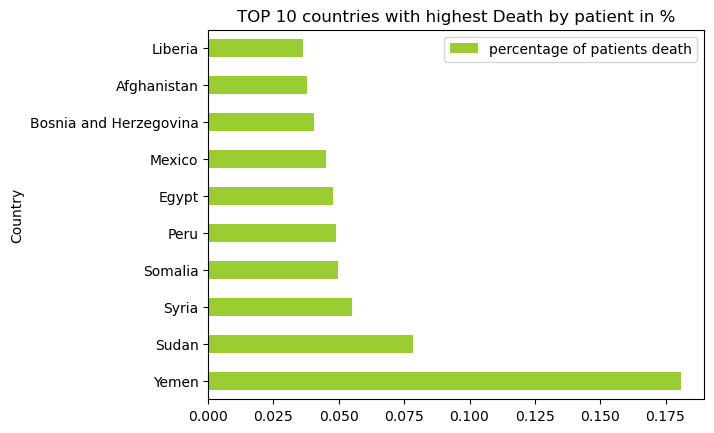

In [142]:
percentage_of_death[:10].plot(kind='barh', x='Country', y='percentage of patients death',color='yellowgreen',title='TOP 10 countries with highest Death by patient in %')
plt.show()

In [ ]:
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(top_cases,x='Country',y='Total Deaths', color='red')
plt.title('Top 10 Countries with most Deaths')
plt.xticks(rotation=75)
plt.subplot(2,2,2)
sns.barplot(less_cases,x='Country',y='Total Deaths', color='teal')
plt.title('Top 10 Countries with less Deaths')
plt.xticks(rotation=75)
plt.show()


In [143]:
fig = px.scatter_geo(covid, locations='Country',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=45,title="Covid-19 Cases of death around the Globe",color_continuous_scale="hot")
fig.show()

In [144]:
fig = px.scatter_geo(covid, locations='Country',locationmode="country names",scope="world",color="Total Cases",size="Total Cases",size_max=45,title="Covid-19 recovery around the Globe",color_continuous_scale='turbo')
fig.show()